# __Face Detection Using Python & Open CV__

In this notebook I will try to make image face detection program using the python programming language, and Open CV with pretrained classifiers. We will detect both the faces and eyes within an image.

__Face detection__ is performed by using classifiers. A classifier is essentially an algorithm that decides whether a given image is positive(face) or negative(not a face). We will use the __Haar classifier__ which was named after the Haar wavelets because of their similarity to detect the faces and eyes on an image. The Haar classifier employs a machine learning algorithm called Adaboost for visual object detection.

## Description: This program detects faces, and eyes.

In [1]:
# Load the libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

Next, I will use Open CV’s pretrained Haar classifers __( haarcascade_frontalface_default.xml & haarcascade_eye.xml)__ which are stored as .xml files, which will help me to detect faces and eyes in an image, and store them in variables. These models were already trained on thousands of images.

__haarcascade_frontalface_default.xml:__ Model trained on many face images, and used to detect faces.

__haarcascade_eye.xml:__ Model trained on many eye images and used to detect eyes.

In [2]:
# Load the haar classifiers
face_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_eye.xml')

Time to read in the image that has the faces I want to detect ! The image I will read in is dwayne_and_james.jpg. This image file contains the images of Dwayne Wade (left) and Lebron James (right).

Note: cv2.imread() stores the image as a numpy array.

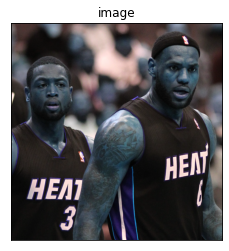

In [17]:
# read and display the image
img = cv2.imread('dataset/dwayne_and_james.jpg')
plt.imshow(img)
plt.title('image')
plt.xticks([])
plt.yticks([])
plt.show()

Get the position (x,y) , width (w), and height(h) of the detected faces in the image, and store it in the variable called ‘faces’.

In [18]:
# returns the position of the detected faces as Rect(x,y,w,h),
faces = face_cascade.detectMultiScale(img, 1.3, 5)

Get some data about the image. Print the number of faces found/detected. Print the image height, width, and channel (RGB visible wavelenghts) . Print the co-ordinates of each face detected within the image.

In [19]:
print('Faces found: ', len(faces))
print('The image height, width, and channel: ',img.shape)
print('The coordinates of each face detected: ', faces)

Faces found:  2
The image height, width, and channel:  (1024, 995, 3)
The coordinates of each face detected:  [[671 112 278 278]
 [ 75 202 233 233]]


Draw a green rectangle around the faces detected with a thickness of ‘2’. This can be achieved by looping through the number of faces and using the coordinates of the faces returned from the image.

In [20]:
for (x,y,w,h) in faces:    
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

Draw a blue rectangle around the eyes detected with a thickness of ‘2’. This can be achieved by looping through the number of eyes detected on the face and using the coordinates of the eyes returned from the face detected.

NOTE: eyes are located on the face, so we can get the coordinates of the face area that was detected to detect the eyes. So face will be the region of interest (ROI) to detect the eyes.

In [21]:
for (x,y,w,h) in faces:    
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_face = img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_face)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_face, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

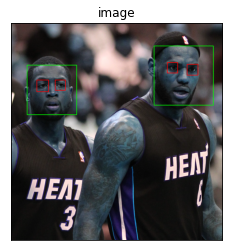

In [22]:
# Show the new image with the rectangles highlighting the detected face and eyes.
plt.imshow(img)
plt.title('image')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
# Show the new image with the rectangles highlighting the detected face and eyes.
# the image will be isplayed for 5 sec. 
plt.imshow(img)
cv2.imshow('image', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

If you want to save the new image then type the following. This will create an image file of the new image with the detected faces called ‘final_image.png’.

In [13]:
cv2.imwrite('dataset/final_image.png',img)

True

__In the below program snippets I will try to make image face detection program using the python programming language, and Open CV with pretrained classifiers. We will detect both the faces and eyes within a video stream. To get the video stream, I will opencv VideoCapture method the get the stream of video.__

In [6]:
# capture the video stream
cap = cv2.VideoCapture(0)

while(True):
    # capture frame-by-frame
    ret, frame = cap.read()
    # convert the frame into gray scale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # capture the face from frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    
    for (x,y,w,h) in faces:    
        #draw a green rectangle around the face 
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        roi_face = frame[y:y + h, x:x + w]
        # capture eyes in roi
        eyes = eye_cascade.detectMultiScale(roi_face)
        for (ex, ey, ew, eh) in eyes:
            # draw rectangle around the eyes
            cv2.rectangle(roi_face, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 3)
                  
        
    # display the resulting frame
    cv2.imshow('frame', frame)
    # use keyword q to close the program
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break  
 
# when everything is done release the capture
cap.release()
cv2.destroyAllWindows()